In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [2]:
data_path1 = os.path.join(os.getcwd(), '../data', 'faces_train_data.csv')
data_path2 = os.path.join(os.getcwd(), '../data', 'faces_test_data.csv')
train = pd.read_csv(data_path1, delimiter = ',')
test = pd.read_csv(data_path2, delimiter = ',')

In [3]:
train_x = train.drop(['smiling'], axis=1)
train_y = train['smiling']

test_x = test.drop(['smiling'], axis=1)
test_y = test['smiling']

In [4]:
print(np.sum(train['smiling']==1))
print(np.sum(train['smiling']==0))

2335
2465


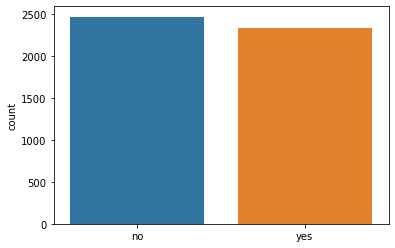

In [5]:
ax = sns.countplot(x="smiling", data=train)
ax.set_xticklabels(['no','yes'])
plt.xlabel('')
plt.show()

In [6]:
print(np.sum(test['smiling']==1))
print(np.sum(test['smiling']==0))

592
608


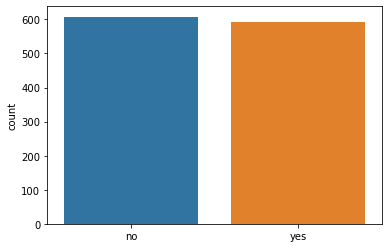

In [7]:
ax = sns.countplot(x="smiling", data=test)
ax.set_xticklabels(['no','yes'])
plt.xlabel('')
plt.show()

In [8]:
smile = train[train['smiling']==1]
smile_att = smile.drop(['smiling'], axis=1)

smile_attx = smile_att.iloc[:,[i%2==0 for i in range(len(train_x.columns))]]
smile_attx_avg = smile_attx.mean(axis=0)[:, np.newaxis]

smile_atty = smile_att.iloc[:,[i%2==1 for i in range(len(train_x.columns))]]
smile_atty_avg = smile_atty.mean(axis=0)[:, np.newaxis]

/Users/xx/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """
/Users/xx/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


In [9]:
print(smile_attx['x50'].mean())
print(smile_atty['y48'].mean())

-0.2210124197002144
-0.06510620985010702


In [10]:
nosmile = train[train['smiling']==0]
nosmile_att = nosmile.drop(['smiling'], axis=1)

nosmile_attx = nosmile_att.iloc[:,[i%2==0 for i in range(len(train_x.columns))]]
nosmile_attx_avg = nosmile_attx.mean(axis=0)[:, np.newaxis]

nosmile_atty = nosmile_att.iloc[:,[i%2==1 for i in range(len(train_x.columns))]]
nosmile_atty_avg = nosmile_atty.mean(axis=0)[:, np.newaxis]

/Users/xx/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """
/Users/xx/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


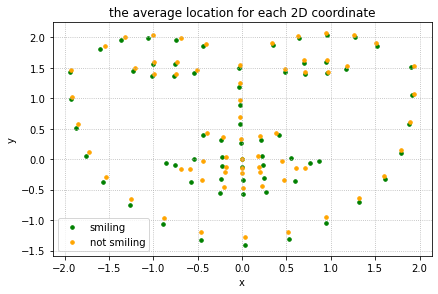

In [11]:
plt.title('the average location for each 2D coordinate')
plt.grid(linestyle=':')

plt.scatter(smile_attx_avg, smile_atty_avg, s=50, marker='.', c='green', label='smiling')
plt.scatter(nosmile_attx_avg, nosmile_atty_avg, s=50, marker='.', c='orange', label='not smiling')

plt.tight_layout()
plt.legend()

plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [12]:
depth = [2, 8, 20]
train_acc = []
test_acc = []
for i in depth:
    clf = DecisionTreeClassifier(random_state=2001, max_depth=i)
    model = clf.fit(train_x, train_y)
    
    train_acc.append(model.score(train_x,train_y))
    test_acc.append(model.score(test_x, test_y))

print(train_acc)
print(test_acc)

[0.7947916666666667, 0.9335416666666667, 1.0]
[0.7816666666666666, 0.8408333333333333, 0.815]


In [13]:
clf = DecisionTreeClassifier(random_state=2001, max_depth=8)
model = clf.fit(train_x, train_y)

feature = model.feature_importances_

print(np.sort(feature))
print(np.argsort(feature))

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00048292
 0.00069988 0.00078737 0.00087485 0.00093318 0.00095745 0.00096732
 0.00097417 0.00097483 0.00099457 0.00106043 0.00124821 0.00125979
 0.00136318 0.00139976 0.00141094 0.0015585  0.00158038 0.00160996
 0.00171789 0.0017497  0.00194775 0.00195484 0.00221963 0.00228628
 0.0023621  0.00